In [3]:
import tensorflow as tf
import numpy as np

In [5]:
X = []
Y = []

for i in range(3000):
  lst = np.random.rand(100)

  idx = np.random.choice(100,2,replace=False)

  zeros = np.zeros(100)

  zeros[idx] = 1

  X.append(np.array(list(zip(zeros,lst))))

  Y.append(np.prod(lst[idx]))



In [6]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape = [100,2]),
                             tf.keras.layers.SimpleRNN(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [7]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
history = model.fit(X[:2560], Y[:2560], epochs = 50, validation_split=0.2)

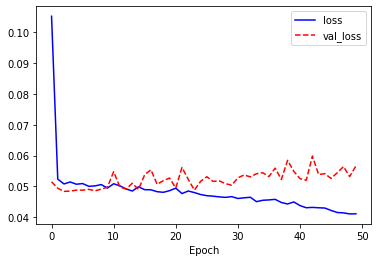

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [9]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560 + 5])

for i in range(5):
  print(Y[2560 + i], '\t', prediction[i][0], '\tdiff :',abs(prediction[i][0] - Y[2560+i]) )

14/14 [==============================] - 0s 13ms/step - loss: 0.0606
0.9162291621143345 	 0.2303606 	diff : 0.6858685647422794
0.020701641922882628 	 0.09751957 	diff : 0.07681792717606681
0.08133790052708974 	 0.22587305 	diff : 0.14453515254679333
0.3764380183852218 	 0.40291166 	diff : 0.026473644670198138
0.35496753111243456 	 0.21482429 	diff : 0.14014324202895373


In [10]:
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail += 1

print('corrections : ', (440-fail)/440 * 100, '%')

corrections :  10.227272727272728 %


In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape = [100,2]),
                             tf.keras.layers.LSTM(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X[:2560], Y[:2560], epochs = 50, validation_split=0.2)

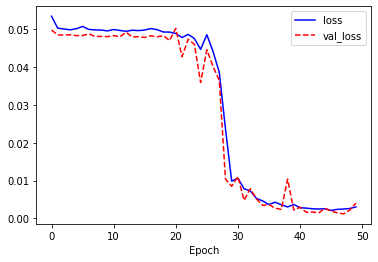

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560 + 5])

for i in range(5):
  print(Y[2560 + i], '\t', prediction[i][0], '\tdiff :',abs(prediction[i][0] - Y[2560+i]) )

14/14 [==============================] - 1s 7ms/step - loss: 0.0053
0.9162291621143345 	 0.6926713 	diff : 0.22355786313362158
0.020701641922882628 	 0.0904067 	diff : 0.06970505904585975
0.08133790052708974 	 0.078787565 	diff : 0.0025503352957664954
0.3764380183852218 	 0.29011416 	diff : 0.08632385403280479
0.35496753111243456 	 0.33080342 	diff : 0.024164106992485224


In [16]:
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail += 1

print('corrections : ', (440-fail)/440 * 100, '%')

corrections :  50.227272727272734 %


In [17]:
model = tf.keras.Sequential([
                             tf.keras.layers.GRU(units=30, return_sequences=True, input_shape = [100,2]),
                             tf.keras.layers.GRU(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X[:2560], Y[:2560], epochs = 50, validation_split=0.2)

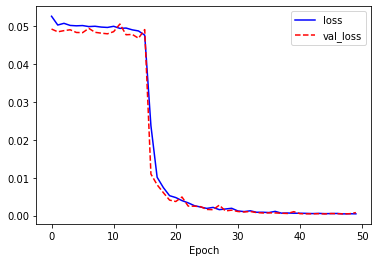

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [20]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560 + 5])

for i in range(5):
  print(Y[2560 + i], '\t', prediction[i][0], '\tdiff :',abs(prediction[i][0] - Y[2560+i]) )

14/14 [==============================] - 1s 7ms/step - loss: 9.5774e-04
0.9162291621143345 	 0.79308736 	diff : 0.12314179887123144
0.020701641922882628 	 0.05458862 	diff : 0.0338869776967253
0.08133790052708974 	 0.11270316 	diff : 0.03136525892439494
0.3764380183852218 	 0.34702206 	diff : 0.02941596180563194
0.35496753111243456 	 0.31559712 	diff : 0.03937041416526049


In [21]:
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail += 1

print('corrections : ', (440-fail)/440 * 100, '%')

corrections :  82.95454545454545 %


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Bidirectional, LSTM

In [24]:
model = Sequential()
model.add(Bidirectional(LSTM(30,return_sequences=True),input_shape = [100,2]))
model.add(Bidirectional(LSTM(30)))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100, 60)           7920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60)                21840     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 29,821
Trainable params: 29,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X[:2560], Y[:2560], epochs = 50, verbose = 1, validation_split=0.2)

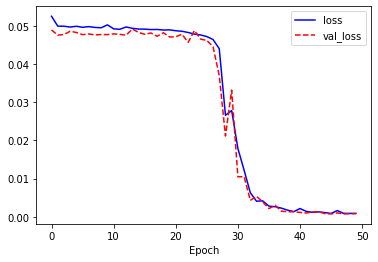

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [27]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560 + 5])

for i in range(5):
  print(Y[2560 + i], '\t', prediction[i][0], '\tdiff :',abs(prediction[i][0] - Y[2560+i]) )

14/14 [==============================] - 2s 13ms/step - loss: 0.0010
0.9162291621143345 	 0.8373415 	diff : 0.07888767470665015
0.020701641922882628 	 0.09915978 	diff : 0.0784581352415766
0.08133790052708974 	 0.108358264 	diff : 0.02702036344233165
0.3764380183852218 	 0.3656472 	diff : 0.010790821615507429
0.35496753111243456 	 0.327464 	diff : 0.02750351682067126


In [28]:
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail += 1

print('corrections : ', (440-fail)/440 * 100, '%')

corrections :  84.31818181818181 %
